In [2]:
cd '/Users/rabarry/Documents/Insight/NYC data'

/Users/rabarry/Documents/Insight/NYC data


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import swifter
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
Data = pd.read_csv('HD_InspCounts_Full.csv')
Data_Avg_Flags = pd.read_csv('HD_grouped_byRest_Years.csv')

In [5]:
Data = Data.drop(columns = ['Unnamed: 0'])
len(Data)
Data = Data.set_index('CAMIS')
Data.head(n=2)
len(Data_Avg_Flags)
Data_Avg_Flags = Data_Avg_Flags.set_index('CAMIS')
Data_Avg_Flags.head(n=2)

25697

,Second_Last_Insp_Type,Second_Last_Insp_Date,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Type,Last_Insp_Date,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
CAMIS,,,,,,,,,,,,,,,,,,,
30075445,Initial,2019-10-21,2.0,Re-inspection,2019-11-04,1,14 days 00:00:00.000000000,MORRIS PARK BAKE SHOP,Bronx,10462.0,Bakery,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37
30112340,Initial,2018-03-13,1.0,Initial,2019-03-04,1,356 days 00:00:00.000000000,WENDY'S,Brooklyn,11225.0,Hamburgers,40.662652,-73.962081,309.0,40.0,32700.0,3029737.0,3.011970e+09,BK60


25697

,total_critical_flags,first_inspection_date,last_inspection_date,num_years_active,avg_num_critical_flags_per_year
CAMIS,,,,,
30075445,5,2017-05-18,2019-11-04,2.0,2.5
30112340,9,2016-04-12,2019-03-04,3.0,3.0


In [6]:
Data["Second_Last_Insp_Date"] = pd.to_datetime(Data["Second_Last_Insp_Date"])
Data["Last_Insp_Date"] = pd.to_datetime(Data["Last_Insp_Date"])
Data['Insp_Date_Diff'] = (Data["Last_Insp_Date"] - Data["Second_Last_Insp_Date"]).dt.days
Data.describe()
Data.dtypes

,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,ZIPCODE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,23794.000000,25697.000000,23794.000000,25298.000000,25647.000000,25647.000000,25248.000000,25248.000000,25248.000000,2.511400e+04,2.564700e+04
mean,1.556359,1.270382,211.831428,10672.241837,40.094740,-72.793501,248.336819,19.914686,28976.979800,2.506026e+06,2.391907e+09
std,1.265577,1.018764,150.515859,596.440637,5.040893,9.151426,131.959125,15.828897,30943.126441,1.357688e+06,1.352866e+09
min,0.000000,0.000000,1.000000,10000.000000,0.000000,-74.248434,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,1.000000,1.000000,61.000000,10022.000000,40.686058,-73.989324,105.000000,4.000000,7900.000000,1.042399e+06,1.010320e+09
50%,1.000000,1.000000,170.000000,10467.000000,40.732767,-73.959469,301.000000,19.000000,15900.000000,3.003576e+06,3.000550e+09
75%,2.000000,2.000000,363.000000,11229.000000,40.761801,-73.899346,401.000000,34.000000,40500.000000,4.000255e+06,4.001625e+09
max,10.000000,10.000000,1071.000000,12345.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09


Second_Last_Insp_Type                          object
Second_Last_Insp_Date                  datetime64[ns]
Second_Last_Insp_Num_CriticialFlags           float64
Last_Insp_Type                                 object
Last_Insp_Date                         datetime64[ns]
Last_Insp_Num_CriticialFlags                    int64
Insp_Date_Diff                                float64
DBA                                            object
BORO                                           object
ZIPCODE                                       float64
CUISINE DESCRIPTION                            object
Latitude                                      float64
Longitude                                     float64
Community Board                               float64
Council District                              float64
Census Tract                                  float64
BIN                                           float64
BBL                                           float64
NTA                         

In [7]:
Data2 = pd.merge(Data, Data_Avg_Flags, left_on = ['CAMIS'], right_on = ['CAMIS'], how = 'left')
len(Data2)
Data2 = Data2.reset_index()
Data2.head()

25697

,CAMIS,Second_Last_Insp_Type,Second_Last_Insp_Date,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Type,Last_Insp_Date,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,DBA,BORO,...,Council District,Census Tract,BIN,BBL,NTA,total_critical_flags,first_inspection_date,last_inspection_date,num_years_active,avg_num_critical_flags_per_year
0,30075445,Initial,2019-10-21,2.0,Re-inspection,2019-11-04,1,14.0,MORRIS PARK BAKE SHOP,Bronx,...,13.0,25200.0,2045445.0,2.041270e+09,BX37,5,2017-05-18,2019-11-04,2.0,2.5
1,30112340,Initial,2018-03-13,1.0,Initial,2019-03-04,1,356.0,WENDY'S,Brooklyn,...,40.0,32700.0,3029737.0,3.011970e+09,BK60,9,2016-04-12,2019-03-04,3.0,3.0
2,30191841,Initial,2018-05-16,1.0,Initial,2019-06-06,1,386.0,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,...,3.0,13900.0,1026048.0,1.010480e+09,MN15,5,2017-07-27,2019-06-06,2.0,2.5
3,40356018,Initial,2018-10-30,1.0,Initial,2019-11-08,1,374.0,RIVIERA CATERERS,Brooklyn,...,47.0,34800.0,3347399.0,3.069970e+09,BK21,3,2017-07-20,2019-11-08,2.0,1.5
4,40356151,Initial,2017-08-19,1.0,Initial,2018-10-06,2,413.0,BRUNOS ON THE BOULEVARD,Queens,...,22.0,32900.0,4024132.0,4.011000e+09,QN28,4,2016-05-14,2018-10-06,2.0,2.0


In [8]:
Data2['Latitude'] = Data2['Latitude'].round(6)
Data2['Longitude'] = Data2['Longitude'].round(6)
Data2['location'] = Data2['Latitude'].astype(str) + ', ' + Data2['Longitude'].astype(str)

In [9]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 26 columns):
CAMIS                                  25697 non-null int64
Second_Last_Insp_Type                  23794 non-null object
Second_Last_Insp_Date                  23794 non-null datetime64[ns]
Second_Last_Insp_Num_CriticialFlags    23794 non-null float64
Last_Insp_Type                         25697 non-null object
Last_Insp_Date                         25697 non-null datetime64[ns]
Last_Insp_Num_CriticialFlags           25697 non-null int64
Insp_Date_Diff                         23794 non-null float64
DBA                                    25697 non-null object
BORO                                   25697 non-null object
ZIPCODE                                25298 non-null float64
CUISINE DESCRIPTION                    25697 non-null object
Latitude                               25647 non-null float64
Longitude                              25647 non-null float64
Community Board   

Text(0.5, 1.0, 'Average Number of Critical Violations')

(0, 20)

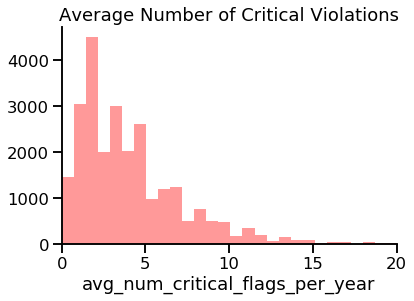

In [10]:
sns.set_context("talk")
sns.distplot(Data2['avg_num_critical_flags_per_year'], kde=False, color='r')
sns.despine()
plt.title('Average Number of Critical Violations')
plt.xlim(0,20) 

Text(0.5, 1.0, 'Number of Critical Violations Last Insp')

(0, 20)

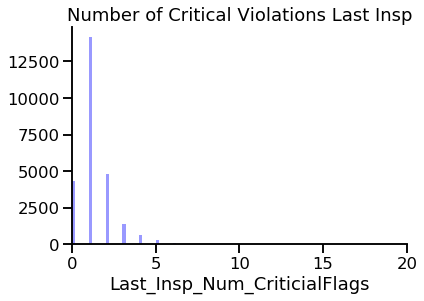

In [11]:
sns.set_context("talk")
sns.distplot(Data2['Last_Insp_Num_CriticialFlags'], kde=False, color='b')
sns.despine()
plt.title('Number of Critical Violations Last Insp')
plt.xlim(0,20) 

In [12]:
Data2['is_good_overall'] = np.where(Data2['avg_num_critical_flags_per_year']>1,0,1)
Data2['is_good_lastInsp'] = np.where(Data2['Last_Insp_Num_CriticialFlags']>1,0,1)
Data2['is_good_overall'].value_counts()
Data2['is_good_lastInsp'].value_counts()

0    21615
1     4082
Name: is_good_overall, dtype: int64

1    18475
0     7222
Name: is_good_lastInsp, dtype: int64

In [13]:
Data2['BORO'].value_counts()

Manhattan        10222
Brooklyn          6399
Queens            5849
Bronx             2291
Staten Island      931
0                    5
Name: BORO, dtype: int64

# Logistic Regression: outcome variable= good at last insp?

In [58]:
DataLog1 = Data2.dropna()
len(DataLog1)
DataLog1['BORO_cat']=DataLog1['BORO'].astype('category')
DataLog1['BORO_cat'] = DataLog1['BORO_cat'].cat.codes
DataLog1['CUISINE DESCRIPTION_cat']=DataLog1['CUISINE DESCRIPTION'].astype('category')
DataLog1['CUISINE DESCRIPTION_cat'] = DataLog1['CUISINE DESCRIPTION_cat'].cat.codes
DataLog1['Second_Last_Insp_Type_cat']=DataLog1['Second_Last_Insp_Type'].astype('category')
DataLog1['Second_Last_Insp_Type_cat'] = DataLog1['Second_Last_Insp_Type_cat'].cat.codes
DataLog1['Second_Last_Insp_Type_cat']=DataLog1['Second_Last_Insp_Type'].astype('category')
DataLog1['Second_Last_Insp_Type_cat'] = DataLog1['Second_Last_Insp_Type_cat'].cat.codes
DataLog1.head()

23255

/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,CAMIS,Second_Last_Insp_Type,Second_Last_Insp_Date,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Type,Last_Insp_Date,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,DBA,BORO,...,first_inspection_date,last_inspection_date,num_years_active,avg_num_critical_flags_per_year,location,is_good_overall,is_good_lastInsp,BORO_cat,CUISINE DESCRIPTION_cat,Second_Last_Insp_Type_cat
0,30075445,Initial,2019-10-21,2.0,Re-inspection,2019-11-04,1,14.0,MORRIS PARK BAKE SHOP,Bronx,...,2017-05-18,2019-11-04,2.0,2.5,"40.848231, -73.855972",0,1,0,7,0
1,30112340,Initial,2018-03-13,1.0,Initial,2019-03-04,1,356.0,WENDY'S,Brooklyn,...,2016-04-12,2019-03-04,3.0,3.0,"40.662652, -73.962081",0,1,1,36,0
2,30191841,Initial,2018-05-16,1.0,Initial,2019-06-06,1,386.0,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,...,2017-07-27,2019-06-06,2.0,2.5,"40.767326, -73.98431",0,1,2,44,0
3,40356018,Initial,2018-10-30,1.0,Initial,2019-11-08,1,374.0,RIVIERA CATERERS,Brooklyn,...,2017-07-20,2019-11-08,2.0,1.5,"40.57992, -73.98209",0,1,1,2,0
4,40356151,Initial,2017-08-19,1.0,Initial,2018-10-06,2,413.0,BRUNOS ON THE BOULEVARD,Queens,...,2016-05-14,2018-10-06,2.0,2.0,"40.763971, -73.880973",0,0,3,2,0


In [60]:
DataLog1.to_csv('DataforWk2.csv')

In [71]:
DataLog1['is_good_overall'].value_counts()
DataLog1['is_good_lastInsp'].value_counts()
len(DataLog1)

0    20646
1     2609
Name: is_good_overall, dtype: int64

1    16723
0     6532
Name: is_good_lastInsp, dtype: int64

23255

In [59]:
DataLog1['ZIPCODE']

0        10462.0
1        11225.0
2        10019.0
3        11224.0
4        11369.0
          ...   
25605    10170.0
25606    10004.0
25638    11423.0
25640    10003.0
25685    11218.0
Name: ZIPCODE, Length: 23255, dtype: float64

In [79]:
Good_x = DataLog1[['BORO_cat','CUISINE DESCRIPTION_cat','Second_Last_Insp_Num_CriticialFlags','Second_Last_Insp_Type_cat','Insp_Date_Diff', 'num_years_active']]
Good_x.head()
Good_x.dtypes

,BORO_cat,CUISINE DESCRIPTION_cat,Second_Last_Insp_Num_CriticialFlags,Second_Last_Insp_Type_cat,Insp_Date_Diff,num_years_active
0,0,7,2.0,0,14.0,2.0
1,1,36,1.0,0,356.0,3.0
2,2,44,1.0,0,386.0,2.0
3,1,2,1.0,0,374.0,2.0
4,3,2,1.0,0,413.0,2.0


BORO_cat                                  int8
CUISINE DESCRIPTION_cat                   int8
Second_Last_Insp_Num_CriticialFlags    float64
Second_Last_Insp_Type_cat                 int8
Insp_Date_Diff                         float64
num_years_active                       float64
dtype: object

In [16]:
Good_x['num_years_active'].value_counts()

2.0    9950
3.0    8851
1.0    3070
0.0    1384
Name: num_years_active, dtype: int64

<Figure size 720x720 with 0 Axes>

(0, 6)

<Figure size 432x288 with 0 Axes>

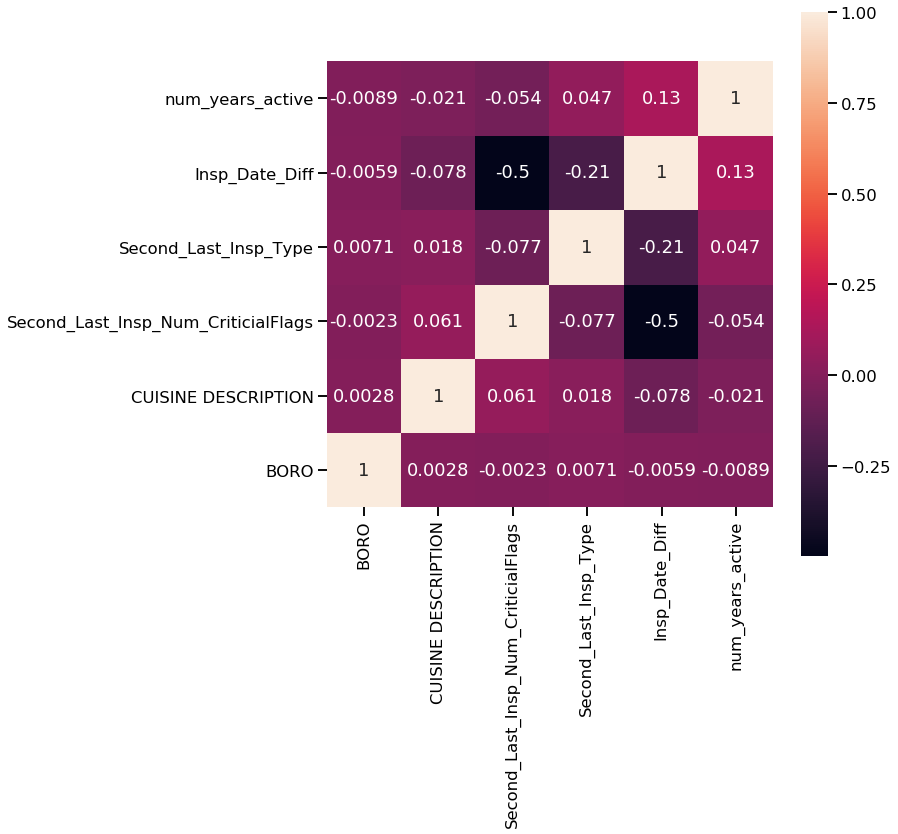

In [28]:
sns.set_context("talk")
plt.tight_layout()
corr=Good_x.corr()
plt.figure(figsize=(10,10))
g = sns.heatmap(corr, cbar=True, annot=True, square=True)
g.set_ylim(0,6)
plt.savefig('Correlation_Matrix.png')

In [81]:
Good_y = DataLog1['is_good_lastInsp'] 
#Good_y =DataLog1['is_good_overall']
#Get rid of the row nums
Good_y = np.ravel(Good_y)
Good_y
len(Good_y)

array([0, 0, 0, ..., 0, 0, 0])

23255

In [82]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

train test split

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Good_x, Good_y, test_size=0.25, random_state=0)

In [84]:
x_test.shape
y_test.shape
x_train.shape
y_train.shape

(5814, 6)

(5814,)

(17441, 6)

(17441,)

In [85]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
predictions = logisticRegr.predict(x_test)

In [87]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9157206742346061


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

<Figure size 576x576 with 0 Axes>

Text(40.5, 0.5, 'Actual label')

Text(0.5, 168.66, 'Predicted label')

Text(0.5, 1, 'Accuracy Score: 0.9157206742346061')

Text(0.5, 168.66, 'true group')

Text(40.5, 0.5, 'predicted group')

(0, 2)

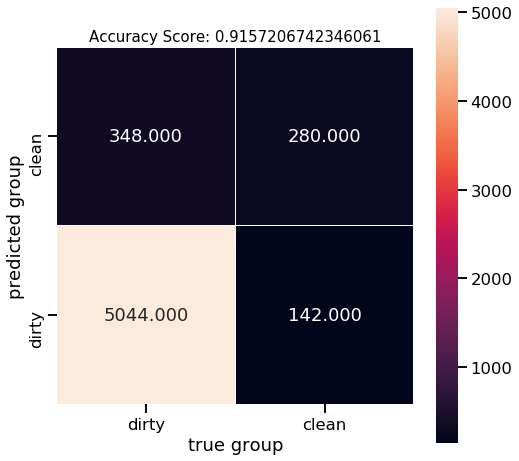

In [89]:
sns.set_context('talk')
Ages = ['dirty', 'clean']
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
g = sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,
           xticklabels=Ages,
           yticklabels=Ages);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.xlabel('true group')
plt.ylabel('predicted group')
g.set_ylim(0,2)
plt.savefig('Confusion_Matrix.png')

In [49]:
import pickle
saved_model = pickle.dumps(logisticRegr)
logistic_from_pickle = pickle.loads(saved_model)

In [50]:
logistic_from_pickle.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])

In [90]:
from sklearn.externals import joblib
joblib.dump(logisticRegr, 'baseline_model.pkl')
logistic_from_pickle = joblib.load('baseline_model.pkl')
logistic_from_pickle.predict(x_test)

['baseline_model.pkl']

array([0, 0, 0, ..., 0, 0, 0])